In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# Local
from robustranking.benchmark import Benchmark
from robustranking.comparison import BootstrapComparison, SubSetComparison, AggregatedComparison
from robustranking.utils import *

## Artificial data

In [3]:
competition = Benchmark()
algorithms = [f"Algorithm-{i}" for i in range(1, 4)]
instances = [f"Instance-{i}" for i in range(1, 101)]
objectives = ["Runtime", "Quality"]

for a, i, o in itertools.product(algorithms, instances, objectives):
    factor = 0.8 if a == "Algorithm-1" else 1
    competition.add_run(a, i, o, factor * np.random.rand())
competition.add_run("Algorithm-1", "Instance-1", "Runtime", 1.0, replace=True)

competition.to_pandas()

value
algorithm   instance     objective          
Algorithm-1 Instance-1   Runtime    1.000000
                         Quality    0.392907
            Instance-2   Runtime    0.248117
                         Quality    0.765200
            Instance-3   Runtime    0.659168
...                                      ...
Algorithm-3 Instance-98  Quality    0.582071
            Instance-99  Runtime    0.235838
                         Quality    0.024951
            Instance-100 Runtime    0.765456
                         Quality    0.000904

[600 rows x 1 columns]

In [4]:
comparison = BootstrapComparison(competition.filter(objectives="Runtime"),
                                 minimise=True,
                                 bootstrap_runs=10000,
                                 aggregation_method=np.mean)
comparison.compute()

In [5]:
comparison.get_confidence_intervals()

,median,lb,ub
algorithm,,,
Algorithm-1,0.401125,0.354521,0.448280
Algorithm-3,0.570806,0.514641,0.625517
Algorithm-2,0.502367,0.447489,0.558960


In [6]:
comparison.get_ranking()

,group,ranked 1st,remaining
algorithm,,,
Algorithm-1,1,0.9978,0.0022
Algorithm-2,2,0.0022,0.0000
Algorithm-3,2,0.0000,0.0000


## SAT 2022 main track

In [9]:
df = pd.read_csv("./Rundata/sc2022-detailed-results/main-seq.csv")
del df["verified-result"]
del df["claimed-result"]
del df["hash"]
df = df.set_index(["benchmark"])
df = df.stack().reset_index().rename(columns={"level_1": "algorithm", "benchmark": "instance", 0: "PAR2"})
df["Solved"] = df["PAR2"] < 10000  # Solved instances
#df = df.set_index(["algorithm", "instance"])#.stack().reset_index().rename(columns={"level_2": "objective", 0: "value"})

competition = Benchmark()
competition.from_pandas(df, "algorithm", "instance", ["PAR2", "Solved"])
print("Complete table:", competition.check_complete())
competition.to_pandas().unstack("objective")

Complete table: True


value       
objective                                               PAR2 Solved
algorithm            instance                                      
CaDiCaL-watchsat-lto 003-23-80.cnf.xz                10000.0  False
                     005-80-12.cnf.xz                2459.43   True
                     006.cnf.xz                      2240.52   True
                     008-80-8.cnf.xz                 1849.96   True
                     20-100-lambda100-49_sat.cnf.xz  27.2633   True
...                                                      ...    ...
kissat_relaxed       worker_500_500_500_0.35.cnf.xz  238.251   True
                     worker_50_150_40_0.85.cnf.xz    10000.0  False
                     worker_50_50_50_0.85.cnf.xz     10000.0  False
                     worker_80_80_80_0.8.cnf.xz      10000.0  False
                     xor_op_n44_d3.cnf.xz            10000.0  False

[20000 rows x 2 columns]

In [10]:
comparison = BootstrapComparison(competition.filter(objectives="PAR2"),
                                 alpha=0.05,
                                 minimise=True,
                                 bootstrap_runs=10000,
                                 aggregation_method=np.sum)
%time comparison.compute()

CPU times: user 1.97 s, sys: 187 ms, total: 2.15 s
Wall time: 2.81 s


In [11]:
comparison.get_ranking()

,group,ranked 1st,remaining
algorithm,,,
Kissat_MAB-HyWalk,1,0.4070,0.5930
kissat_inc,1,0.2389,0.3541
kissat_pre,1,0.1269,0.2272
ekissat-mab-db-v1,1,0.0681,0.1591
Kissat_MAB_UCB,1,0.0363,0.1228
Kissat_MAB_MOSS,1,0.0285,0.0943
SeqFROST-ERE-All,1,0.0249,0.0694
kissat-mab-gb,1,0.0201,0.0493
Kissat_MAB_ESA,1,0.0171,0.0322


Kissat_MAB-HyWalk vs SeqFROST-NoExtend: 0.0248


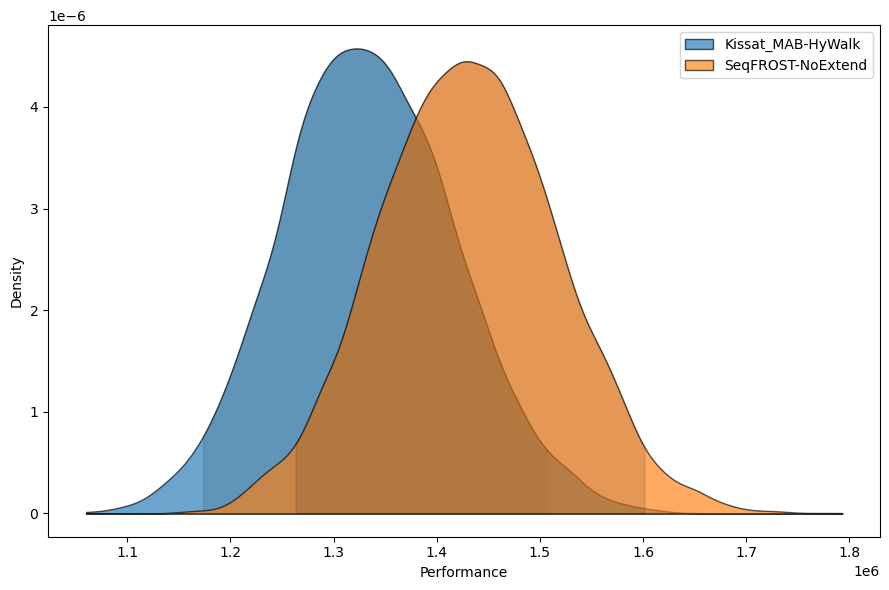

In [73]:
algorithms = ["Kissat_MAB-HyWalk", "SeqFROST-NoExtend"]
plot_distributions_comparison(comparison, algorithms)

In [74]:
comparison.statistical_test(*algorithms)

0.0248

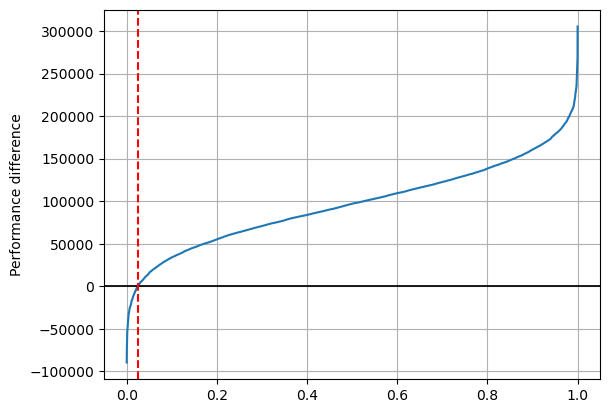

In [75]:
cache = comparison._get_cache()
s1 = cache["meta_data"]["algorithms"].index(algorithms[0])
s2 = cache["meta_data"]["algorithms"].index(algorithms[1])

distributions = cache["distributions"]
p_value = comparison.statistical_test(*algorithms)
direction = -1 if comparison.minimise else 1
diff = direction * (distributions[s1,:] - distributions[s2,:])
diff = np.sort(diff)
plt.grid()
plt.plot(np.linspace(0, 1, len(diff)),diff)
plt.axhline(0, c="black", linewidth=1.25, linestyle="-")
plt.axvline(p_value, c="red", linestyle="--")
plt.ylabel("Performance difference")
plt.show()


In [14]:
comparison = SubSetComparison(competition,
                              alpha=0.05,
                              minimise=True,
                              subset_size=2,
                              aggregation_method=PAR(2, 5000))
%time comparison.compute()

79800 Samples
CPU times: user 30.2 s, sys: 4.17 s, total: 34.4 s
Wall time: 39.1 s


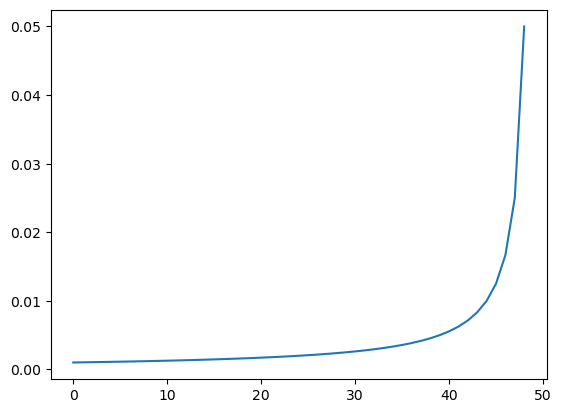

In [77]:
plt.plot(0.05 / (49-np.arange(49)))